In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import Dataset
import collections  # Import collections module
import netCDF4 as nc

import os

import matplotlib.pyplot as plt
import numpy as np

import copy

npyPath = "skogsstyrelsen-data"
ncPath = "skogsstyrelsen-data/2A-netcdfs-cropped-from-nuria"

In [ ]:


# List of file names
file_names = [
    "skogs_json_test.npy"
]

# Load and print contents of each file
for file_name in file_names:
    full_path = os.path.join(npyPath, file_name)  # Include folder path
    if os.path.exists(full_path):  # Ensure file exists
        data = np.load(full_path, allow_pickle=True)  # Load the .npy file
        
        # Extract 'ValideringsobjektBildId' and 'MolnDis' from each JSON line
        if isinstance(data, np.ndarray) and data.size > 0 and isinstance(data[0], dict):
            for item in data:
                valideringsobjekt_bild_id = item.get('ValideringsobjektBildId', 'N/A')
                moln_dis = item.get('MolnDis', 'N/A')
                print(f"ValideringsobjektBildId: {valideringsobjekt_bild_id}, MolnDis: {moln_dis}")
                # Add to a list of lists
                data_list = []
                data_list.append([valideringsobjekt_bild_id, moln_dis])
                
        else:
            print(f"File {file_name} does not contain the expected JSON data.")
    else:
        print(f"File {file_name} does not exist.")

print(data_list)
    

ValideringsobjektBildId: 765861ec-42c7-ed11-9174-005056a6f472, MolnDis: 0
[['765861ec-42c7-ed11-9174-005056a6f472', '0']]
ValideringsobjektBildId: 1657a784-3ac7-ed11-9174-005056a6f472, MolnDis: 0
[['1657a784-3ac7-ed11-9174-005056a6f472', '0']]
ValideringsobjektBildId: ee53636e-47c7-ed11-9174-005056a6f472, MolnDis: 1
[['ee53636e-47c7-ed11-9174-005056a6f472', '1']]
ValideringsobjektBildId: 6a61b1e6-45c7-ed11-9174-005056a6f472, MolnDis: 0
[['6a61b1e6-45c7-ed11-9174-005056a6f472', '0']]
ValideringsobjektBildId: 50b88b11-3ec7-ed11-9174-005056a6f472, MolnDis: 0
[['50b88b11-3ec7-ed11-9174-005056a6f472', '0']]
ValideringsobjektBildId: 2b9b58f6-43c7-ed11-9174-005056a6f472, MolnDis: 0
[['2b9b58f6-43c7-ed11-9174-005056a6f472', '0']]
ValideringsobjektBildId: be364825-46c7-ed11-9174-005056a6f472, MolnDis: 0
[['be364825-46c7-ed11-9174-005056a6f472', '0']]
ValideringsobjektBildId: 215a7a53-3ac7-ed11-9174-005056a6f472, MolnDis: 0
[['215a7a53-3ac7-ed11-9174-005056a6f472', '0']]
ValideringsobjektBildId:

1
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    date_created: 2023-06-28T13:15:03.973814
    Conventions: CF-1.6, ACDD-1.3
    history: NetCDF-CF file created by datacube version '1.8.12' at 20230628.
    coordinates: spatial_ref
    geospatial_bounds: POLYGON ((13.059491329436598 58.53385040226678, 13.05938715618964 58.53573539266168, 13.055782459041836 58.5356808638235, 13.055886825494202 58.533795877436255, 13.059491329436598 58.53385040226678))
    geospatial_bounds_crs: EPSG:4326
    geospatial_lat_min: 58.533795877436255
    geospatial_lat_max: 58.53573539266168
    geospatial_lat_units: degrees_north
    geospatial_lon_min: 13.055782459041836
    geospatial_lon_max: 13.059491329436598
    geospatial_lon_units: degrees_east
    dimensions(sizes): time(1), y(21), x(21)
    variables(dimensions): float64 time(time), float64 y(y), float64 x(x), int32 spatial_ref(), float32 b01(time, y, x), float32 b02(time, y, x), float32 b03(time, y, x), float32 b

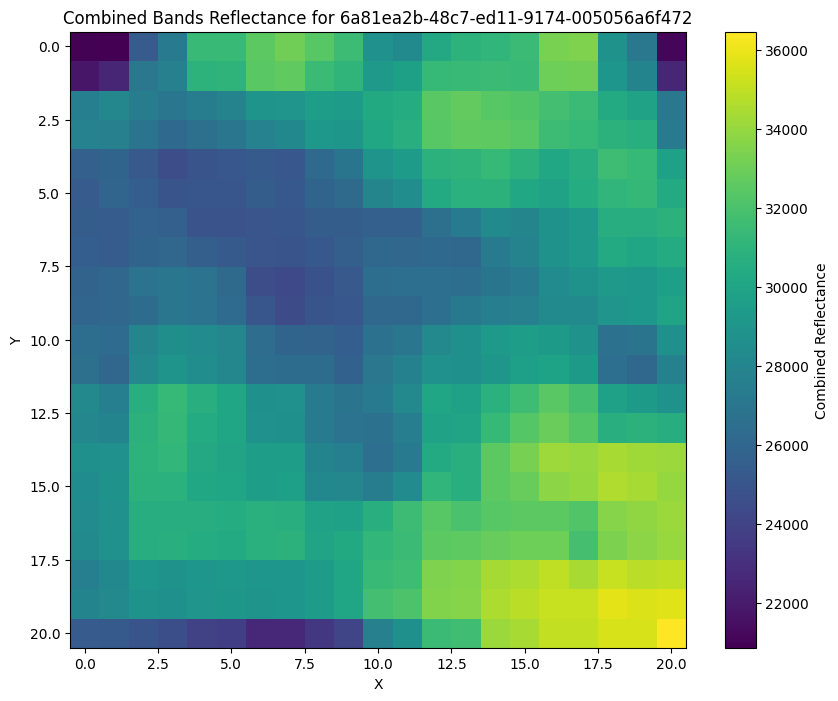

IndexError: list index out of range

In [42]:
# Ensure data_list has at least 5 items
print(len(data_list))
for i in range(5):
    # Define the file path for the current item in data_list
    file_path = os.path.join(ncPath, f'skgs_{data_list[i][0]}.nc')

    # Open the netCDF file
    dataset = nc.Dataset(file_path, 'r')

    # Print the information of the netCDF file
    print(dataset)

    # Iterate through all the bands in the dataset
    for band in dataset.variables:
        if band.startswith('b'):
            band_data = dataset.variables[band][:]

    # Combine all bands data
    combined_bands = np.zeros_like(band_data[0, :, :])
    for band in dataset.variables:
        if band.startswith('b'):
            combined_bands += dataset.variables[band][0, :, :]

    # Plot the combined bands data
    plt.figure(figsize=(10, 8))
    plt.imshow(combined_bands, cmap='viridis')
    plt.colorbar(label='Combined Reflectance')
    plt.title(f'Combined Bands Reflectance for {data_list[i][0]}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
